In [16]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.pipeline import Pipeline, FeatureUnion
from matplotlib import pyplot as plt
import seaborn as sns
from mypipes import *
import warnings
from sklearn.metrics import roc_curve, auc
warnings.filterwarnings('ignore')


In [17]:
import pandas as pd

train_file = r'D:\jupyter notebook\New folder\store_train.csv'
test_file = r'D:\jupyter notebook\New folder\store_test.csv'

bd_train = pd.read_csv(train_file, encoding="Windows-1252")  
bd_predict = pd.read_csv(test_file,  encoding="Windows-1252")  

In [18]:

bd_predict.info

<bound method DataFrame.info of               Id  sales0  sales1  sales2  sales3  sales4  country  State  \
0      101799999     696     511     514     867    1034     17.0      1   
1      101999999     599     481     500     883     894     19.0      1   
2      102199999     599     423     475     802    1061     21.0      1   
3      103599999     599     459     462     883     886     35.0      1   
4      103799999     599     481     505     746     801     37.0      1   
...          ...     ...     ...     ...     ...     ...      ...    ...   
1426  2202599999     627     493     524     924    1010     25.0     22   
1427  4826999999     651     461     506     811     944    269.0     48   
1428  2301333840     922     743     748    1182    1232     13.0     23   
1429  1908199999     593     402     438     739     862     81.0     19   
1430  2302559705     746     599     627    1015    1019     25.0     23   

      CouSub        countyname         storecode  \
0  

In [19]:
bd_train.head()

,Id,sales0,sales1,sales2,sales3,sales4,country,State,CouSub,countyname,storecode,Areaname,countytownname,population,state_alpha,store_Type,store
0,2300919770,848,588,666,1116,1133,9,23,19770,Hancock County,NCNTY23009N23009,"Hancock County, ME",Eastbrook town,423.0,ME,Supermarket Type1,0
1,5000129575,925,717,780,1283,1550,1,50,29575,Addison County,NCNTY50001N50001,"Addison County, VT",Granville town,298.0,VT,Supermarket Type1,0
2,2501308470,924,616,739,1154,1314,13,25,8470,Hampden County,METRO44140M44140,"Springfield, MA HUD Metro FMR Area",Brimfield town,3609.0,MA,Supermarket Type1,1
3,603599999,924,646,683,1292,1297,35,6,99999,Lassen County,NCNTY06035N06035,"Lassen County, CA",Lassen County,34895.0,CA,Supermarket Type3,0
4,5002760100,1017,730,735,1208,1326,27,50,60100,Windsor County,NCNTY50027N50027,"Windsor County, VT",Rochester town,1139.0,VT,Supermarket Type1,0


In [20]:
bd_train.columns

Index(['Id', 'sales0', 'sales1', 'sales2', 'sales3', 'sales4', 'country',
       'State', 'CouSub', 'countyname', 'storecode', 'Areaname',
       'countytownname', 'population', 'state_alpha', 'store_Type', 'store'],
      dtype='object')

In [21]:
# Dependent variable/ Target 
bd_train['store']

0       0
1       0
2       1
3       0
4       0
       ..
3333    1
3334    0
3335    1
3336    0
3337    1
Name: store, Length: 3338, dtype: int64

In [22]:
bd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              3338 non-null   int64  
 1   sales0          3338 non-null   int64  
 2   sales1          3338 non-null   int64  
 3   sales2          3338 non-null   int64  
 4   sales3          3338 non-null   int64  
 5   sales4          3338 non-null   int64  
 6   country         3338 non-null   int64  
 7   State           3338 non-null   int64  
 8   CouSub          3338 non-null   int64  
 9   countyname      3338 non-null   object 
 10  storecode       3338 non-null   object 
 11  Areaname        3338 non-null   object 
 12  countytownname  3338 non-null   object 
 13  population      3337 non-null   float64
 14  state_alpha     3338 non-null   object 
 15  store_Type      3338 non-null   object 
 16  store           3338 non-null   int64  
dtypes: float64(1), int64(10), object(

In [24]:
print(bd_train.isnull().sum())
print(bd_predict.isnull().sum())

Id                0
sales0            0
sales1            0
sales2            0
sales3            0
sales4            0
country           0
State             0
CouSub            0
countyname        0
storecode         0
Areaname          0
countytownname    0
population        1
state_alpha       0
store_Type        0
store             0
dtype: int64
Id                0
sales0            0
sales1            0
sales2            0
sales3            0
sales4            0
country           1
State             0
CouSub            0
countyname        0
storecode         0
Areaname          0
countytownname    0
population        1
state_alpha       0
store_Type        0
dtype: int64


In [25]:
# Get all numeric columns
num_vars = list(bd_train.select_dtypes(exclude=['object']).columns)
num_vars


['Id',
 'sales0',
 'sales1',
 'sales2',
 'sales3',
 'sales4',
 'country',
 'State',
 'CouSub',
 'population',
 'store']

In [26]:
pd.to_numeric(bd_train['store'], errors = "coerce").isnull().sum()

0

In [27]:
# Exclude REF_NO as its an identifier column. Revenue.Grid is the target column
num_vars = [_ for _ in num_vars if _ not in ['Id','store']]
num_vars

['sales0',
 'sales1',
 'sales2',
 'sales3',
 'sales4',
 'country',
 'State',
 'CouSub',
 'population']

In [28]:
# Get all categorcial columns
cat_vars = list(bd_train.select_dtypes(include=['object']).columns)
cat_vars

['countyname',
 'storecode',
 'Areaname',
 'countytownname',
 'state_alpha',
 'store_Type']

In [29]:
pd.to_numeric(bd_train['Areaname'], errors = "coerce").isnull().sum()

3338

In [ ]:
# Drop Irrelevant Column
# Id: Unique identifier, not useful for prediction.
# storecode: Encoded values, should not be used directly.
    
bd_train.drop(columns=["Id", "storecode"], inplace=True)
bd_predict.drop(columns=["Id", "storecode"], inplace=True)

# Train-Test Split

In [32]:
# First get the dependent/ target variable

target = np.where(bd_train['store'] == 1, 1, 0) # 1 represents store will open and 0 represents store will not open
target

array([0, 0, 1, ..., 1, 0, 1])

In [33]:
# Perform an 80-20 split
bd_train, bd_test, y_train, y_test = train_test_split(bd_train, target, test_size=0.2, random_state=42)

In [34]:
print(bd_train.shape)
print(y_train.shape)
print(bd_test.shape)
print(y_test.shape)

(2670, 15)
(2670,)
(668, 15)
(668,)



# Data Pipeline

In [35]:
# #create dummies 'countyname','storecode','Areaname''countytownname','state_alpha', 'store_Type
#missing value imputer--'sales0','sales1','sales2','sales3', 'sales4','country','State','CouSub','population'


In [36]:
# Pipeline 1: convert to numeric
p1 = Pipeline([
    ('var_select', variable_selector(['country'])),
    ('convert_to_numeric', convert_to_numeric()),
    ('missing_trt',missing_value_imputer())
])

In [37]:
# Pipeline 2: impute missing values with median
p3 = Pipeline([
    ('var_select', variable_selector(['sales0','sales1','sales2','sales3', 'sales4','country','State','CouSub','population'])),
    ('missing_trt',missing_value_imputer())
])

In [38]:
p2 = Pipeline([
('var_select',variable_selector(['countyname','Areaname','countytownname','state_alpha', 'store_Type'])),
('missing_trt',missing_value_imputer()),
('create_dummies',create_dummies (20))
])

In [39]:
# FeatureUnion concatenates results of multiple transformer objects
#all pipelines stiched together
data_pipe = FeatureUnion([
('num',p1),
('obj_to_dummmy',p2),
('fill_missing',p3),
])

# Fit pipeline (Training or Learning)

In [40]:
# Learn from training data
# fit() method will invoke fit() from each task in each of the pipeline to "LEARN" from historical data
data_pipe.fit(bd_train)

FeatureUnion(transformer_list=[('num',
                                Pipeline(steps=[('var_select',
                                                 variable_selector(feature_names=['country'])),
                                                ('convert_to_numeric',
                                                 convert_to_numeric()),
                                                ('missing_trt',
                                                 missing_value_imputer())])),
                               ('obj_to_dummmy',
                                Pipeline(steps=[('var_select',
                                                 variable_selector(feature_names=['countyname',
                                                                                  'Areaname',
                                                                                  'countytownname',
                                                                                  'state_alpha',
                                                                                  'store_Type'])),
                                                ('missing_trt',
                                                 missing_value_imputer()),
                                                ('create_dummies',
                                                 create_dummies(freq_cutoff=20))])),
                               ('fill_missing',
                                Pipeline(steps=[('var_select',
                                                 variable_selector(feature_names=['sales0',
                                                                                  'sales1',
                                                                                  'sales2',
                                                                                  'sales3',
                                                                                  'sales4',
                                                                                  'country',
                                                                                  'State',
                                                                                  'CouSub',
                                                                                  'population'])),
                                                ('missing_trt',
                                                 missing_value_imputer())]))])

In [41]:
len(data_pipe.get_feature_names_out())

79

# Apply or Transform using built Pipeline

In [42]:
# Apply pipeline on training data

# transform() method will invoke transform() from each task in each of the pipeline to "APPLY" the learnings
x_train=pd.DataFrame(data=data_pipe.transform(bd_train),
                    columns=data_pipe.get_feature_names_out())

In [43]:
x_train

,num__country,obj_to_dummmy__countyname_Washington County,obj_to_dummmy__countyname_Franklin County,obj_to_dummmy__countyname_Aroostook County,obj_to_dummmy__countyname_Penobscot County,obj_to_dummmy__countyname_Essex County,obj_to_dummmy__countyname_Middlesex County,obj_to_dummmy__countyname_Worcester County,obj_to_dummmy__countyname_Hancock County,obj_to_dummmy__countyname_Windham County,...,obj_to_dummmy__store_Type_Supermarket Type3,fill_missing__sales0,fill_missing__sales1,fill_missing__sales2,fill_missing__sales3,fill_missing__sales4,fill_missing__country,fill_missing__State,fill_missing__CouSub,fill_missing__population
0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,847.0,504.0,672.0,1055.0,1132.0,15.0,23.0,48645.0,1752.0
1,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,922.0,743.0,748.0,1182.0,1232.0,13.0,23.0,51620.0,355.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,604.0,399.0,448.0,890.0,893.0,5.0,29.0,99999.0,5685.0
3,263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,772.0,567.0,571.0,961.0,1169.0,263.0,13.0,99999.0,6865.0
4,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,631.0,419.0,466.0,878.0,881.0,107.0,17.0,99999.0,30305.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,169.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,781.0,465.0,649.0,1151.0,1383.0,169.0,29.0,99999.0,52274.0
2666,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,620.0,422.0,523.0,841.0,929.0,3.0,28.0,99999.0,37057.0
2667,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,848.0,588.0,666.0,1116.0,1133.0,9.0,23.0,53620.0,2.0
2668,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,651.0,480.0,484.0,814.0,1046.0,67.0,27.0,99999.0,42239.0


In [44]:
# Apply pipeline on testing data
x_test=pd.DataFrame(data=data_pipe.transform(bd_test),
                    columns=data_pipe.get_feature_names_out())

In [45]:
x_test

,num__country,obj_to_dummmy__countyname_Washington County,obj_to_dummmy__countyname_Franklin County,obj_to_dummmy__countyname_Aroostook County,obj_to_dummmy__countyname_Penobscot County,obj_to_dummmy__countyname_Essex County,obj_to_dummmy__countyname_Middlesex County,obj_to_dummmy__countyname_Worcester County,obj_to_dummmy__countyname_Hancock County,obj_to_dummmy__countyname_Windham County,...,obj_to_dummmy__store_Type_Supermarket Type3,fill_missing__sales0,fill_missing__sales1,fill_missing__sales2,fill_missing__sales3,fill_missing__sales4,fill_missing__country,fill_missing__State,fill_missing__CouSub,fill_missing__population
0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,593.0,402.0,450.0,788.0,792.0,93.0,19.0,99999.0,7089.0
1,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,643.0,383.0,475.0,876.0,1139.0,51.0,55.0,99999.0,5916.0
2,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,586.0,473.0,494.0,805.0,967.0,11.0,13.0,99999.0,18395.0
3,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,714.0,551.0,561.0,946.0,1062.0,43.0,36.0,99999.0,64519.0
4,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,927.0,678.0,732.0,1199.0,1461.0,11.0,25.0,51265.0,7839.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,179.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,672.0,434.0,512.0,858.0,898.0,179.0,19.0,99999.0,35625.0
664,510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,816.0,533.0,633.0,1063.0,1206.0,510.0,29.0,99999.0,319294.0
665,17.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1494.0,1071.0,1196.0,1861.0,2023.0,17.0,25.0,81035.0,38120.0
666,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,996.0,641.0,796.0,1403.0,1656.0,3.0,27.0,99999.0,330844.0


In [46]:
# Apply pipeline on prediction data
x_predict=pd.DataFrame(data=data_pipe.transform(bd_predict),
                    columns=data_pipe.get_feature_names_out())

In [47]:
x_predict

,num__country,obj_to_dummmy__countyname_Washington County,obj_to_dummmy__countyname_Franklin County,obj_to_dummmy__countyname_Aroostook County,obj_to_dummmy__countyname_Penobscot County,obj_to_dummmy__countyname_Essex County,obj_to_dummmy__countyname_Middlesex County,obj_to_dummmy__countyname_Worcester County,obj_to_dummmy__countyname_Hancock County,obj_to_dummmy__countyname_Windham County,...,obj_to_dummmy__store_Type_Supermarket Type3,fill_missing__sales0,fill_missing__sales1,fill_missing__sales2,fill_missing__sales3,fill_missing__sales4,fill_missing__country,fill_missing__State,fill_missing__CouSub,fill_missing__population
0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,696.0,511.0,514.0,867.0,1034.0,17.0,1.0,99999.0,34215.0
1,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,599.0,481.0,500.0,883.0,894.0,19.0,1.0,99999.0,25989.0
2,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,599.0,423.0,475.0,802.0,1061.0,21.0,1.0,99999.0,43643.0
3,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,599.0,459.0,462.0,883.0,886.0,35.0,1.0,99999.0,13228.0
4,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,599.0,481.0,505.0,746.0,801.0,37.0,1.0,99999.0,11539.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,627.0,493.0,524.0,924.0,1010.0,25.0,22.0,99999.0,10407.0
1427,269.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,651.0,461.0,506.0,811.0,944.0,269.0,48.0,99999.0,286.0
1428,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,922.0,743.0,748.0,1182.0,1232.0,13.0,23.0,33840.0,1536.0
1429,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,593.0,402.0,438.0,739.0,862.0,81.0,19.0,99999.0,11341.0


# Add Intercept/ Constant Column in Dataset

In [48]:
x_train = sm.add_constant(x_train)

# Multicollinearity Check

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

In [50]:
vif_data["Feature"] = x_train.columns

In [51]:
vif_sorted = vif_data.sort_values("VIF", ascending = False)
vif_sorted

,VIF,Feature
25,inf,"obj_to_dummmy__Areaname_Grafton County, NH"
76,inf,fill_missing__country
1,inf,num__country
19,inf,"obj_to_dummmy__Areaname_Aroostook County, ME"
4,inf,obj_to_dummmy__countyname_Aroostook County
...,...,...
10,1.188847,obj_to_dummmy__countyname_Windham County
14,1.164207,obj_to_dummmy__countyname_York County
11,1.161248,obj_to_dummmy__countyname_Cumberland County
3,1.125847,obj_to_dummmy__countyname_Franklin County


# Write a loop to automatically remove highly multicollinear features from data in an iterative manner

In [52]:
# Make a cop to remove the high VIF features
x_train_copy = x_train.copy()

In [53]:
# We can write a for loop to iteratively remove highly multicollinear features which are beyond a threshold of 5

threshold = 5
max_vif = vif_sorted.iloc[0,0]


while max_vif > threshold:
    vif_data = pd.DataFrame()
    vif_data["VIF"] = [variance_inflation_factor(x_train_copy.values, i) for i in range(x_train_copy.shape[1])]
    vif_data["Feature"] = x_train_copy.columns
    vif_sorted = vif_data.sort_values("VIF", ascending = False)
    
    max_vif = vif_sorted.iloc[0,0]
    feature_to_drop = vif_sorted.iloc[0,1]
    
    if max_vif > threshold:
        x_train_copy.drop(columns=[feature_to_drop], axis = 1, inplace = True)
        print(f"Removed {feature_to_drop} having VIF {max_vif}")

Removed obj_to_dummmy__Areaname_Grafton County, NH having VIF inf
Removed num__country having VIF inf
Removed obj_to_dummmy__Areaname_Aroostook County, ME having VIF inf
Removed const having VIF 213.86579526267374
Removed fill_missing__sales0 having VIF 1057.5533627760947
Removed fill_missing__sales2 having VIF 518.5510589560295
Removed fill_missing__sales3 having VIF 318.0395539517191
Removed fill_missing__sales1 having VIF 115.31830600050606
Removed fill_missing__State having VIF 42.623449876132206
Removed obj_to_dummmy__Areaname_Coos County, NH having VIF 24.56732846836133
Removed fill_missing__sales4 having VIF 22.428422789285012
Removed fill_missing__CouSub having VIF 13.949057821496929
Removed obj_to_dummmy__Areaname_Hancock County, ME having VIF 5.470491613532137
Removed obj_to_dummmy__store_Type_Supermarket Type1 having VIF 5.300200574145326


In [54]:
# Add the intercept back to the data as we should always include a intercept in the model means always have a constant in the data
X_with_intercept = sm.add_constant(x_train[x_train_copy.columns])

In [55]:
print(len(x_train.columns))
print(len(x_train_copy.columns))
x_train_copy.columns

80
66


Index(['obj_to_dummmy__countyname_Washington County',
       'obj_to_dummmy__countyname_Franklin County',
       'obj_to_dummmy__countyname_Aroostook County',
       'obj_to_dummmy__countyname_Penobscot County',
       'obj_to_dummmy__countyname_Essex County',
       'obj_to_dummmy__countyname_Middlesex County',
       'obj_to_dummmy__countyname_Worcester County',
       'obj_to_dummmy__countyname_Hancock County',
       'obj_to_dummmy__countyname_Windham County',
       'obj_to_dummmy__countyname_Cumberland County',
       'obj_to_dummmy__countyname_Coos County',
       'obj_to_dummmy__countyname_Grafton County',
       'obj_to_dummmy__countyname_York County',
       'obj_to_dummmy__countyname_Lincoln County',
       'obj_to_dummmy__countyname_Rockingham County',
       'obj_to_dummmy__countyname_Carroll County',
       'obj_to_dummmy__Areaname_Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area',
       'obj_to_dummmy__Areaname_Providence-Fall River, RI-MA HUD Metro FMR Area',
       '

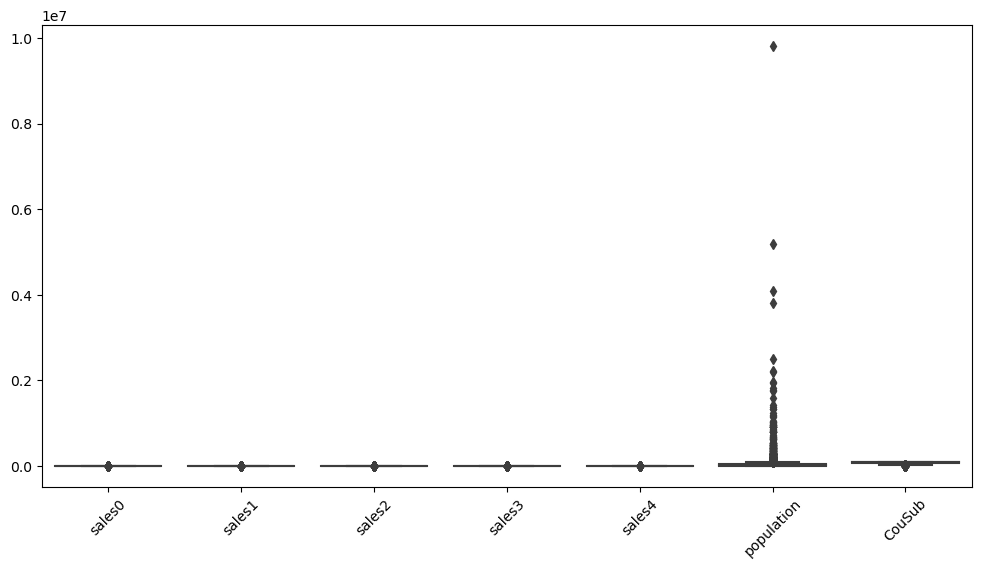

In [56]:
# Using Boxplots

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["sales0", "sales1", "sales2", "sales3", "sales4", "population", "CouSub"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=bd_train[numeric_cols])
plt.xticks(rotation=45)
plt.show()


In [57]:
# Using Z-score Method

from scipy.stats import zscore

outlier_threshold = 3  # Common threshold
z_scores = bd_train[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > outlier_threshold).sum()

print("Number of outliers in each feature:\n", outliers)


Number of outliers in each feature:
 sales0        20
sales1        26
sales2        30
sales3        23
sales4        31
population     0
CouSub         0
dtype: int64


In [58]:
# Interquartile Range (IQR) is another approach:

Q1 = bd_train[numeric_cols].quantile(0.25)
Q3 = bd_train[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((bd_train[numeric_cols] < (Q1 - 1.5 * IQR)) | (bd_train[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outlier count per feature:\n", outliers)


Outlier count per feature:
 sales0        112
sales1        133
sales2        109
sales3        133
sales4         49
population    334
CouSub        133
dtype: int64


In [59]:
for col in numeric_cols:
    bd_train[col] = bd_train[col].clip(lower=bd_train[col].quantile(0.05), upper=bd_train[col].quantile(0.95))


# Build Model  1 logistic regression model

In [60]:
# Fit the logistic regression model
model = sm.Logit(y_train, X_with_intercept).fit()

# Print the logistic regression summary
print(model.summary())

         Current function value: 0.565076
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2670
Model:                          Logit   Df Residuals:                     2603
Method:                           MLE   Df Model:                           66
Date:                Thu, 27 Mar 2025   Pseudo R-squ.:                  0.1724
Time:                        22:47:55   Log-Likelihood:                -1508.8
converged:                      False   LL-Null:                       -1823.0
Covariance Type:            nonrobust   LLR p-value:                 1.164e-92
                                                                                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------

In [61]:
# Access all pvalues
model.pvalues

const                                          6.527961e-06
obj_to_dummmy__countyname_Washington County    5.230973e-02
obj_to_dummmy__countyname_Franklin County      4.980248e-01
obj_to_dummmy__countyname_Aroostook County     9.519854e-01
obj_to_dummmy__countyname_Penobscot County     9.957913e-01
                                                   ...     
obj_to_dummmy__state_alpha_WA                  7.483441e-01
obj_to_dummmy__store_Type_Grocery Store        7.521125e-01
obj_to_dummmy__store_Type_Supermarket Type3    5.257760e-01
fill_missing__country                          9.549130e-01
fill_missing__population                       2.511593e-12
Length: 67, dtype: float64

In [62]:
# Max pvalue
model.pvalues.iloc[1:].max()

0.9965445780499108

In [63]:
X_with_intercept_copy = X_with_intercept.copy()

In [64]:
# Similar to VIF, we can write a for loop to iteratively remove high p-value features beyond a threshold of 0.1

threshold = 0.1
max_pvalue = model.pvalues.iloc[1:].max()

while max_pvalue > threshold:
    
    temp_model = sm.Logit(y_train, X_with_intercept_copy).fit(disp=0)
    max_pvalue = temp_model.pvalues.iloc[1:].max()
    feature_to_drop = temp_model.pvalues.idxmax()
    
    if max_pvalue > threshold:
        X_with_intercept_copy.drop(columns=[feature_to_drop], axis = 1, inplace = True)
        print(f"Removed {feature_to_drop} having pvalue {max_pvalue}")

Removed obj_to_dummmy__Areaname_Penobscot County, ME (part) HUD Metro FMR Area having pvalue 0.9965445780499108
Removed obj_to_dummmy__state_alpha_MI having pvalue 0.9669676061970722
Removed obj_to_dummmy__countyname_Hancock County having pvalue 0.9547473288749568
Removed obj_to_dummmy__countyname_Aroostook County having pvalue 0.9587196647934948
Removed fill_missing__country having pvalue 0.9552481180963238
Removed obj_to_dummmy__state_alpha_SD having pvalue 0.9409700554810272
Removed obj_to_dummmy__state_alpha_KS having pvalue 0.945334975222333
Removed obj_to_dummmy__state_alpha_MO having pvalue 0.9241090273681952
Removed obj_to_dummmy__Areaname_Boston-Cambridge-Quincy, MA-NH HUD Metro FMR Area having pvalue 0.9097608551975127
Removed obj_to_dummmy__Areaname_Providence-Fall River, RI-MA HUD Metro FMR Area having pvalue 0.8620658424449887
Removed obj_to_dummmy__state_alpha_KY having pvalue 0.8431599686556337
Removed obj_to_dummmy__state_alpha_WA having pvalue 0.7531429888697951
Remove

In [65]:
X_with_intercept_copy.columns

Index(['const', 'obj_to_dummmy__countyname_Penobscot County',
       'obj_to_dummmy__countyname_Essex County',
       'obj_to_dummmy__countyname_Worcester County',
       'obj_to_dummmy__countyname_Windham County',
       'obj_to_dummmy__countyname_Cumberland County',
       'obj_to_dummmy__countyname_York County',
       'obj_to_dummmy__countyname_Rockingham County',
       'obj_to_dummmy__countyname_Carroll County',
       'obj_to_dummmy__state_alpha_ME', 'obj_to_dummmy__state_alpha_MA',
       'obj_to_dummmy__state_alpha_VT', 'obj_to_dummmy__state_alpha_GA',
       'obj_to_dummmy__state_alpha_CT', 'obj_to_dummmy__state_alpha_VA',
       'obj_to_dummmy__state_alpha_IN', 'obj_to_dummmy__state_alpha_NE',
       'obj_to_dummmy__state_alpha_TN', 'obj_to_dummmy__state_alpha_PR',
       'obj_to_dummmy__state_alpha_LA', 'obj_to_dummmy__state_alpha_ND',
       'obj_to_dummmy__state_alpha_RI', 'fill_missing__population'],
      dtype='object')

In [66]:
# Fit the logistic regression model
final_model = sm.Logit(y_train, X_with_intercept[X_with_intercept_copy.columns]).fit()

# Print the logistic regression summary
print(final_model.summary())

Optimization terminated successfully.
         Current function value: 0.570666
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2670
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                           22
Date:                Thu, 27 Mar 2025   Pseudo R-squ.:                  0.1642
Time:                        22:47:56   Log-Likelihood:                -1523.7
converged:                       True   LL-Null:                       -1823.0
Covariance Type:            nonrobust   LLR p-value:                1.681e-112
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                     

# Test Data Prediction (Probabilities)

In [67]:
final_model.params

const                                         -0.813709
obj_to_dummmy__countyname_Penobscot County     3.925302
obj_to_dummmy__countyname_Essex County        -1.210598
obj_to_dummmy__countyname_Worcester County    -0.977744
obj_to_dummmy__countyname_Windham County      -1.298613
obj_to_dummmy__countyname_Cumberland County    2.627366
obj_to_dummmy__countyname_York County          3.709945
obj_to_dummmy__countyname_Rockingham County    1.917939
obj_to_dummmy__countyname_Carroll County      -1.081858
obj_to_dummmy__state_alpha_ME                 -0.690322
obj_to_dummmy__state_alpha_MA                  2.963813
obj_to_dummmy__state_alpha_VT                 -0.586714
obj_to_dummmy__state_alpha_GA                  0.373153
obj_to_dummmy__state_alpha_CT                  1.567842
obj_to_dummmy__state_alpha_VA                  0.607916
obj_to_dummmy__state_alpha_IN                  0.633840
obj_to_dummmy__state_alpha_NE                 -0.661621
obj_to_dummmy__state_alpha_TN                  0

In [68]:
# Pick only those features that exist in the model (using final_model.params.index). In addition, add "const" to x_test
x_test_intercept = sm.add_constant(x_test[final_model.params.index[1:]])

In [69]:
predict_test_prob = final_model.predict(x_test_intercept)

In [70]:
# These are probabilites of falling into "open store"
predict_test_prob

# For example: For the 0th row -> There is 31.22% chance that this store will open. That
# means. On the other hand, if you consider 
# row 4 -> There is 89.811% chance that store will open there

0      0.312223
1      0.311372
2      0.406518
3      0.355344
4      0.898128
         ...   
663    0.333301
664    0.565993
665    0.907119
666    0.575557
667    0.468955
Length: 668, dtype: float64

# Model Validation

# ROC

In [71]:
# Predict on training data and then calculate various metrics

predict_train_prob = final_model.predict(x_train[final_model.params.index])
predict_train_prob

0       0.182708
1       0.182004
2       0.311205
3       0.397151
4       0.329317
          ...   
2665    0.345921
2666    0.334377
2667    0.181826
2668    0.338287
2669    0.728850
Length: 2670, dtype: float64

In [72]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, predict_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, predict_test_prob)

# Calculate AUC
roc_auc_train = auc(fpr_train, tpr_train)
# Calculate AUC
roc_auc_test = auc(fpr_test, tpr_test)

roc_auc_train, roc_auc_test

(0.7849854557309348, 0.7536054238505747)

# ROC Plot

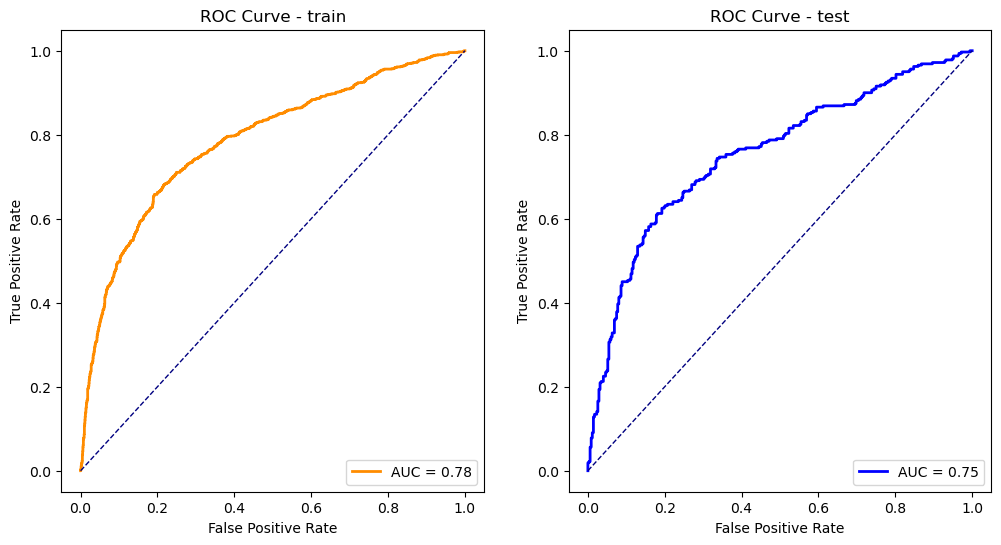

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax = ax.flatten()
# Plot ROC curve
ax[0].plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'AUC = {roc_auc_train:.2f}')
ax[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('ROC Curve - train')
ax[0].legend(loc='lower right')


ax[1].plot(fpr_test, tpr_test, color='blue', lw=2, label=f'AUC = {roc_auc_test:.2f}')
ax[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve - test')
ax[1].legend(loc='lower right')

plt.show()

# KS-Stat, F1-Score, ROC for cutoff selection

In [74]:
# Multiple cutoff points
cutoffs=np.linspace(0.01,0.99,99)
cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [75]:
KS_all=[]
F1_Score_all = []
ROC_all = []
real = y_train

for cutoff in cutoffs:
    
    predicted = np.where(predict_train_prob >= cutoff, 1, 0)

    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
    
    Precision = TP/(TP+FP)
    Recall = TP/P
    
    # F1-Score
    F1_Score = 2*Precision*Recall/(Precision + Recall)
    F1_Score_all.append(F1_Score)
    
    # KS-Stat  
    KS=(TP/P)-(FP/N)
    KS_all.append(KS)
    
    # ROC
    fpr_train, tpr_train, thresholds_train = roc_curve(real, predicted)
    roc_auc_train = auc(fpr_train, tpr_train)
    ROC_all.append(roc_auc_train)


In [76]:
evaluation_df = pd.DataFrame({"Cutoff": cutoffs, "KS": KS_all, "F1_Score": F1_Score_all, "ROC": ROC_all})
evaluation_df

evaluation_df.sort_values("KS", ascending = False)

,Cutoff,KS,F1_Score,ROC
35,0.36,0.462590,0.690328,0.731295
36,0.37,0.461464,0.686283,0.730732
37,0.38,0.459909,0.682613,0.729954
34,0.35,0.457382,0.690972,0.728691
33,0.34,0.450230,0.692662,0.725115
...,...,...,...,...
5,0.06,0.000000,0.599528,0.500000
4,0.05,0.000000,0.599528,0.500000
3,0.04,0.000000,0.599528,0.500000
2,0.03,0.000000,0.599528,0.500000


In [77]:
mycutoff = evaluation_df["Cutoff"][evaluation_df["ROC"] == max(evaluation_df["ROC"])].values[0]
mycutoff

0.36000000000000004

In [78]:
# the above cutoff point can now be used to evaluate on test data and then if looks okay, we can make prediction on inference data as well

# Test Data Prediction (Probabilities to Classes)

In [79]:
predict_test_prob

0      0.312223
1      0.311372
2      0.406518
3      0.355344
4      0.898128
         ...   
663    0.333301
664    0.565993
665    0.907119
666    0.575557
667    0.468955
Length: 668, dtype: float64

In [80]:
predict_test_class = np.where(predict_test_prob > mycutoff, 1, 0)
predict_test_class

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [81]:
pd.crosstab(y_test, predict_test_class)

col_0,0,1
row_0,,
0,275,73
1,117,203


In [82]:
from sklearn.metrics import f1_score

f1_score(y_test, predict_test_class)

0.6812080536912752

# using  Random Forest Classifier model

In [83]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=500,  # More trees for better performance
    max_depth=10,  # Control depth to prevent overfitting
    min_samples_split=5,  # Minimum samples per split
    min_samples_leaf=2,  # Minimum samples per leaf
    random_state=42,
    class_weight="balanced",  # Helps if target is imbalanced
    n_jobs=-1  # Use all available CPU cores
)

# Train the model
model.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [84]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for validation set
val_probs = model.predict_proba(x_train)[:, 1]

# Calculate AUC Score
auc_score = roc_auc_score(y_train, val_probs)
print(f"Validation AUC Score: {auc_score:.5f}")


Validation AUC Score: 0.90184


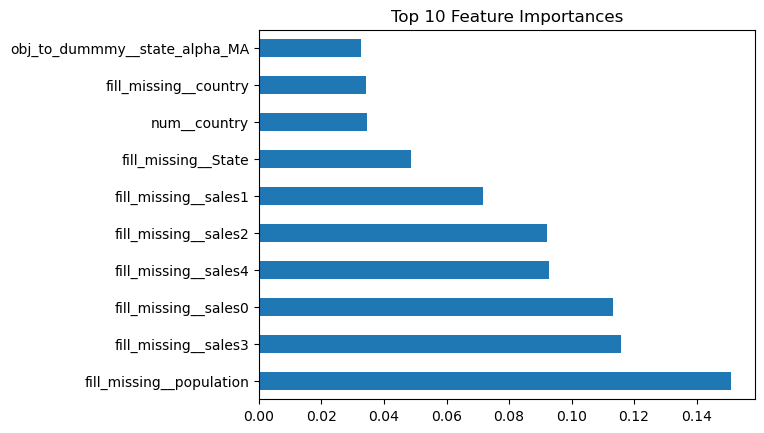

In [85]:
# To see which features impact the model the most:

import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feature_importances.nlargest(10).plot(kind="barh")  # Top 10 features
plt.title("Top 10 Feature Importances")
plt.show()


In [86]:
x_test = sm.add_constant(x_test)

In [87]:
# Predict on Test Data
test_probs = model.predict_proba(x_test)[:, 1]

In [88]:
x_predict = sm.add_constant(x_predict)

In [89]:
# Predict on predict  Data  x_predict
predict_probs = model.predict_proba(x_predict)[:, 1]

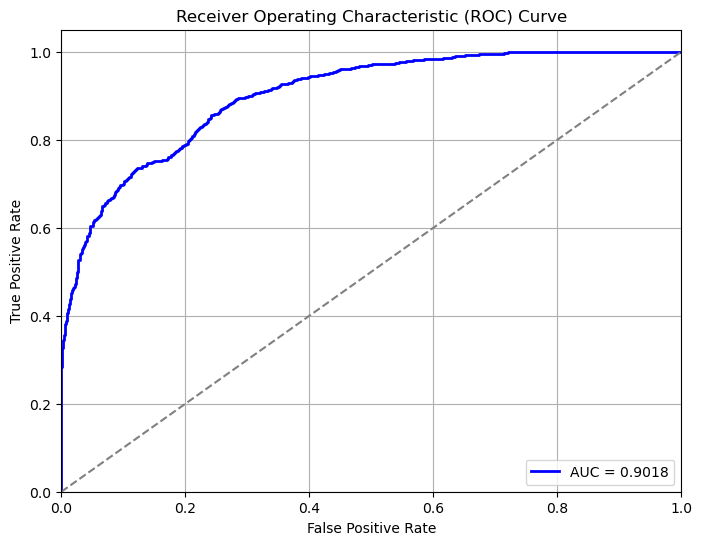

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train)[:, 1])  # y_val is the actual validation labels
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [91]:
submission = pd.DataFrame({"store": predict_probs})
submission.to_csv("Ankit_Raj_P2_part2.csv", index=False)


In [92]:
print(submission.head())  # Check first few rows
print(submission.isnull().sum())  # Ensure no missing values
print(submission.describe())  # Ensure values are between 0 and 1


      store
0  0.364706
1  0.284018
2  0.328936
3  0.229912
4  0.233793
store    0
dtype: int64
             store
count  1431.000000
mean      0.463484
std       0.242545
min       0.097624
25%       0.257511
50%       0.347636
75%       0.710485
max       0.943579


In [93]:
print(len(bd_predict))  # Should be 1431
print(len(x_predict))  # Should be 1431


1431
1431


In [94]:
bd_predict.info


<bound method DataFrame.info of               Id  sales0  sales1  sales2  sales3  sales4  country  State  \
0      101799999     696     511     514     867    1034     17.0      1   
1      101999999     599     481     500     883     894     19.0      1   
2      102199999     599     423     475     802    1061     21.0      1   
3      103599999     599     459     462     883     886     35.0      1   
4      103799999     599     481     505     746     801     37.0      1   
...          ...     ...     ...     ...     ...     ...      ...    ...   
1426  2202599999     627     493     524     924    1010     25.0     22   
1427  4826999999     651     461     506     811     944    269.0     48   
1428  2301333840     922     743     748    1182    1232     13.0     23   
1429  1908199999     593     402     438     739     862     81.0     19   
1430  2302559705     746     599     627    1015    1019     25.0     23   

      CouSub        countyname         storecode  \
0  

In [95]:
submission = pd.DataFrame({"store": predict_probs})
submission.to_csv("Ankit_Raj_P2_part2.csv", index=False)